**<font color=black size=5 face=雅黑>引入第三方库</font>**

In [1]:
import re,math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier as KNN
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

d:\python\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\python\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
d:\python\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


**<font color=black size=5 face=雅黑>数据的获取，读取csv文件</font>**

In [2]:
CSV_FILE_PATH = './work/Data.csv'
df = pd.read_csv(CSV_FILE_PATH)
print(df.head())

          domain  target
0    youtube.com       0
1      baidu.com       0
2       sohu.com       0
3     taobao.com       0
4  wikipedia.org       0


**<font color=black size=5 face=雅黑>特征一：域名中“.”的数量</font>**

In [3]:
# 特征1：点的数量
def pointnumber(domain):
    count = domain.count(".")
    return count
df['point number'] = df['domain'].apply(pointnumber)
print(df.head())

          domain  target  point number
0    youtube.com       0             1
1      baidu.com       0             1
2       sohu.com       0             1
3     taobao.com       0             1
4  wikipedia.org       0             1


**<font color=black size=5 face=雅黑>特征二：域名的长度</font>**

In [4]:
def lenth(domain):
    l = len(domain)
    return l
df['length'] = df['domain'].apply(lenth)
print(df.head())

          domain  target  point number  length
0    youtube.com       0             1      11
1      baidu.com       0             1       9
2       sohu.com       0             1       8
3     taobao.com       0             1      10
4  wikipedia.org       0             1      13


**<font color=black size=5 face=雅黑>特征三：域名中横线的数量</font>**

In [5]:
def horizonnumber(domain):
    count = domain.count("-")
    return count
df['horizon number'] = df['domain'].apply(horizonnumber)
print(df.head())

          domain  target  point number  length  horizon number
0    youtube.com       0             1      11               0
1      baidu.com       0             1       9               0
2       sohu.com       0             1       8               0
3     taobao.com       0             1      10               0
4  wikipedia.org       0             1      13               0


**<font color=black size=5 face=雅黑>特征四：域名中的连续字符数</font>**

In [6]:
def consecutivechar(domain):
    #连续字母字符的最大长度
    str = domain.split('.')[0]
    list1 = []
    list2 = []
    pattern = '[a-z,A-Z]'

    r = re.compile(pattern)
    for i in str:
        if r.match(i):
            list1.append(i)
        else:
            if len(list1) > len(list2):
                list2 = [i for i in list1]
            list1 = []
    if len(list1) > len(list2):
        return len(list1)
    else:
        return len(list2)
df['constar'] = df['domain'].apply(consecutivechar)
print(df.head())

          domain  target  point number  length  horizon number  constar
0    youtube.com       0             1      11               0        7
1      baidu.com       0             1       9               0        5
2       sohu.com       0             1       8               0        4
3     taobao.com       0             1      10               0        6
4  wikipedia.org       0             1      13               0        9


**<font color=black size=5 face=雅黑>特征五：信息熵</font>**

In [7]:
def entropy(domain):

    #信息熵，表示字符串的随机程度
    #𝐇(𝐱) = −𝒔𝒖𝒎(𝒑(𝒙)𝒍𝒐𝒈𝟐𝒑(𝒙))

    str = domain.split('.')[0]

    h = 0.0
    sumletter = 0
    sumnum = 0
    letter = [0] * 26
    num = [0] * 10
    str = str.lower()

    for i in range(len(str)):
        if str[i].isalpha():
            letter[ord(str[i]) - ord('a')] += 1
            sumletter += 1
        if str[i].isnumeric():
            num[int(str[i])] += 1
            sumnum += 1
    # print('\n', letter)
    # print('\n', num)
    sum = sumletter + sumnum
    for i in range(26):
        p = 1.0 * letter[i] / sum
        if p > 0:
            h += -(p * math.log(p, 2))
    for i in range(10):
        p = 1.0 * num[i] / sum
        if p > 0:
            h += -(p * math.log(p, 2))
    return h
df['entr'] = df['domain'].apply(entropy)
print(df.head())

          domain  target  point number  length  horizon number  constar  \
0    youtube.com       0             1      11               0        7   
1      baidu.com       0             1       9               0        5   
2       sohu.com       0             1       8               0        4   
3     taobao.com       0             1      10               0        6   
4  wikipedia.org       0             1      13               0        9   

       entr  
0  2.521641  
1  2.321928  
2  2.000000  
3  1.918296  
4  2.641604  


**<font color=black size=5 face=雅黑>特征六：最长元音距</font>**

In [8]:
def mvd(domain):

    #最长元音距
    vowel = ['a', 'e', 'i', 'o', 'u', '-']
    index = []
    length = 0
    maxlen = 0

    str = domain.split('.')[0]

    for i in range(len(str)):

        if str[i] in vowel:

            index.append(i)

    index.append(len(str))

    #print(index)

    for i in  range(len(index) - 1):

        length = index[i + 1] - index[i] - 1

        if length > maxlen:

            maxlen = length

    return maxlen
df['mvdlen'] = df['domain'].apply(mvd)
print(df.head())

          domain  target  point number  length  horizon number  constar  \
0    youtube.com       0             1      11               0        7   
1      baidu.com       0             1       9               0        5   
2       sohu.com       0             1       8               0        4   
3     taobao.com       0             1      10               0        6   
4  wikipedia.org       0             1      13               0        9   

       entr  mvdlen  
0  2.521641       1  
1  2.321928       1  
2  2.000000       1  
3  1.918296       1  
4  2.641604       1  


**<font color=black size=5 face=雅黑>特征七：域名中数字占总字符比例</font>**

In [9]:
def numberratio(domain):
    count = 0
    str = domain.split('.')[0]
    for i in str:
        if i.isdigit() is True:
            count += 1
    numofdomain = len(str)
    ratio = count / numofdomain
    return ratio
df['numberratio'] = df['domain'].apply(numberratio)
print(df.head())

          domain  target  point number  length  horizon number  constar  \
0    youtube.com       0             1      11               0        7   
1      baidu.com       0             1       9               0        5   
2       sohu.com       0             1       8               0        4   
3     taobao.com       0             1      10               0        6   
4  wikipedia.org       0             1      13               0        9   

       entr  mvdlen  numberratio  
0  2.521641       1          0.0  
1  2.321928       1          0.0  
2  2.000000       1          0.0  
3  1.918296       1          0.0  
4  2.641604       1          0.0  


**<font color=black size=5 face=雅黑>特征八：是否为主流域名</font>**

In [10]:
def suffix(domain):
    #是否主流域名后缀

    list = domain.split('.')
    suff = list[len(list) - 1]
    Mainstream = ['com', 'cn', 'org', 'edu', 'net']
    if suff in Mainstream:
        return 1
    else:
        return 0
df['ismainstream'] = df['domain'].apply(suffix)
print(df.head())

          domain  target  point number  length  horizon number  constar  \
0    youtube.com       0             1      11               0        7   
1      baidu.com       0             1       9               0        5   
2       sohu.com       0             1       8               0        4   
3     taobao.com       0             1      10               0        6   
4  wikipedia.org       0             1      13               0        9   

       entr  mvdlen  numberratio  ismainstream  
0  2.521641       1          0.0             1  
1  2.321928       1          0.0             1  
2  2.000000       1          0.0             1  
3  1.918296       1          0.0             1  
4  2.641604       1          0.0             1  


**<font color=black size=5 face=雅黑>特征九：域名中连续数字字符的长度</font>**

In [11]:
def consecutivenumber(domain):
    #连续数字字符的最大长度
    str = domain.split('.')[0]
    list1 = []
    list2 = []
    pattern = '[1-9]'

    r = re.compile(pattern)
    for i in str:
        if r.match(i):
            list1.append(i)
        else:
            if len(list1) > len(list2):
                list2 = [i for i in list1]
            list1 = []
    if len(list1) > len(list2):
        return len(list1)
    else:
        return len(list2)
df['consnumber'] = df['domain'].apply(consecutivenumber)
print(df.head())

          domain  target  point number  length  horizon number  constar  \
0    youtube.com       0             1      11               0        7   
1      baidu.com       0             1       9               0        5   
2       sohu.com       0             1       8               0        4   
3     taobao.com       0             1      10               0        6   
4  wikipedia.org       0             1      13               0        9   

       entr  mvdlen  numberratio  ismainstream  consnumber  
0  2.521641       1          0.0             1           0  
1  2.321928       1          0.0             1           0  
2  2.000000       1          0.0             1           0  
3  1.918296       1          0.0             1           0  
4  2.641604       1          0.0             1           0  


**<font color=black size=5 face=雅黑>特征十：域名中连续相同字符长度</font>**

In [12]:
def consecutivesamechar(domain):

    #连续相同字母字符的最大长度
    curmaxlen = 1
    maxlen = 1

    str = domain.split('.')[0]

    list = []

    for i in str:

        if len(list) == 0:

            list.append(i)

        elif i == list[0]:

            list.append(i)

        else:

            #print(list)

            curmaxlen = len(list)

            list = []

            list.append(i)

        if curmaxlen > maxlen:

            maxlen = curmaxlen

    return maxlen
df['consamenum'] = df['domain'].apply(consecutivesamechar)
print(df.head())

          domain  target  point number  length  horizon number  constar  \
0    youtube.com       0             1      11               0        7   
1      baidu.com       0             1       9               0        5   
2       sohu.com       0             1       8               0        4   
3     taobao.com       0             1      10               0        6   
4  wikipedia.org       0             1      13               0        9   

       entr  mvdlen  numberratio  ismainstream  consnumber  consamenum  
0  2.521641       1          0.0             1           0           1  
1  2.321928       1          0.0             1           0           1  
2  2.000000       1          0.0             1           0           1  
3  1.918296       1          0.0             1           0           1  
4  2.641604       1          0.0             1           0           1  


**<font color=black size=5 face=雅黑>特征十一：是否为免费域名</font>**

In [13]:
def iffreedomain(domain):
    freedomain = ['gq', 'cf', 'tk', 'ml', 'ga', 'men', 'loan', 'date', 'tw', 'bid', 'country', 'stream', 'download',
                  'xin', 'gdn', 'racing', 'jetzt', 'win', 'vip', 'ren', 'kim', 'mom', 'party', 'review', 'trade',
                  'date', 'wang', 'accountants']
    domainlist = domain.split('.')
    suff = domainlist[len(domainlist) - 1]
    if suff in freedomain:
        return 1
    else:
        return 0
df['iffreedomain'] = df['domain'].apply(iffreedomain)
print(df.head())

          domain  target  point number  length  horizon number  constar  \
0    youtube.com       0             1      11               0        7   
1      baidu.com       0             1       9               0        5   
2       sohu.com       0             1       8               0        4   
3     taobao.com       0             1      10               0        6   
4  wikipedia.org       0             1      13               0        9   

       entr  mvdlen  numberratio  ismainstream  consnumber  consamenum  \
0  2.521641       1          0.0             1           0           1   
1  2.321928       1          0.0             1           0           1   
2  2.000000       1          0.0             1           0           1   
3  1.918296       1          0.0             1           0           1   
4  2.641604       1          0.0             1           0           1   

   iffreedomain  
0             0  
1             0  
2             0  
3             0  
4             

**<font color=black size=5 face=雅黑>将处理后的特征写入CSV文件</font>**

In [14]:
# 写入excel文件
df.to_csv("./work/Data_after_pro.csv",index=False,sep=',')

**<font color=black size=5 face=雅黑>训练模型数据集导入并分割训练集和测试集</font>**

In [15]:
data_lite = df[['point number', 'length', 'horizon number', 'constar', 'entr', 'mvdlen', 'numberratio', 'ismainstream',
                'consnumber', 'consamenum', 'iffreedomain', 'target']]
# 下面看一下数据的前五行是不是我们想要的结果
data_dummies = data_lite
print(data_lite.head())
features = data_dummies.loc[:,'point number':'iffreedomain']
X = features.values
y = data_dummies['target'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=9)  # 拆分成训练集和测试集

   point number  length  horizon number  constar      entr  mvdlen  \
0             1      11               0        7  2.521641       1   
1             1       9               0        5  2.321928       1   
2             1       8               0        4  2.000000       1   
3             1      10               0        6  1.918296       1   
4             1      13               0        9  2.641604       1   

   numberratio  ismainstream  consnumber  consamenum  iffreedomain  target  
0          0.0             1           0           1             0       0  
1          0.0             1           0           1             0       0  
2          0.0             1           0           1             0       0  
3          0.0             1           0           1             0       0  
4          0.0             1           0           1             0       0  


**<font color=black size=5 face=雅黑>随机森林训练模型及分数评估</font>**

In [16]:
# 经过调参后，用100棵树最大深度为15的随机森林拟合数据
forest = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=15, random_state=0)
forest.fit(X_train, y_train)
# 模型的评估
y_test_pre = forest.predict(X_test)
test_accuracy = forest.score(X_test, y_test)
print("这里是随机森林模型的评估：")
print("\n测试集的accuracy：", test_accuracy)
test_precision = precision_score(y_test, y_test_pre)
print("\n测试集的precision：", test_precision)
test_recall = recall_score(y_test, y_test_pre)
print("\n测试集的召回值：", test_recall)
test_f1 = f1_score(y_test, y_test_pre)
print("\n测试集的f1：", test_f1)
print("\n")
print(classification_report(y_test,y_test_pre))

这里是随机森林模型的评估：

测试集的accuracy： 0.9145568575672554

测试集的precision： 0.9216493476312208

测试集的召回值： 0.9078749427693112

测试集的f1： 0.9147102917675745


              precision    recall  f1-score   support

           0       0.91      0.92      0.91     30012
           1       0.92      0.91      0.91     30578

    accuracy                           0.91     60590
   macro avg       0.91      0.91      0.91     60590
weighted avg       0.91      0.91      0.91     60590



**<font color=black size=5 face=雅黑>特征重要度排序</font>**

这里是特征的重要度排序：

Index(['point number', 'length', 'horizon number', 'constar', 'entr', 'mvdlen',
       'numberratio', 'ismainstream', 'consnumber', 'consamenum',
       'iffreedomain'],
      dtype='object')
 1) entr                           0.314291
 2) length                         0.218909
 3) constar                        0.170811
 4) mvdlen                         0.170081
 5) point number                   0.038759
 6) horizon number                 0.023640
 7) consamenum                     0.020803
 8) ismainstream                   0.019536
 9) numberratio                    0.013431
10) consnumber                     0.009057
11) iffreedomain                   0.000681


C:\Users\asus\AppData\Roaming\Python\Python38\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


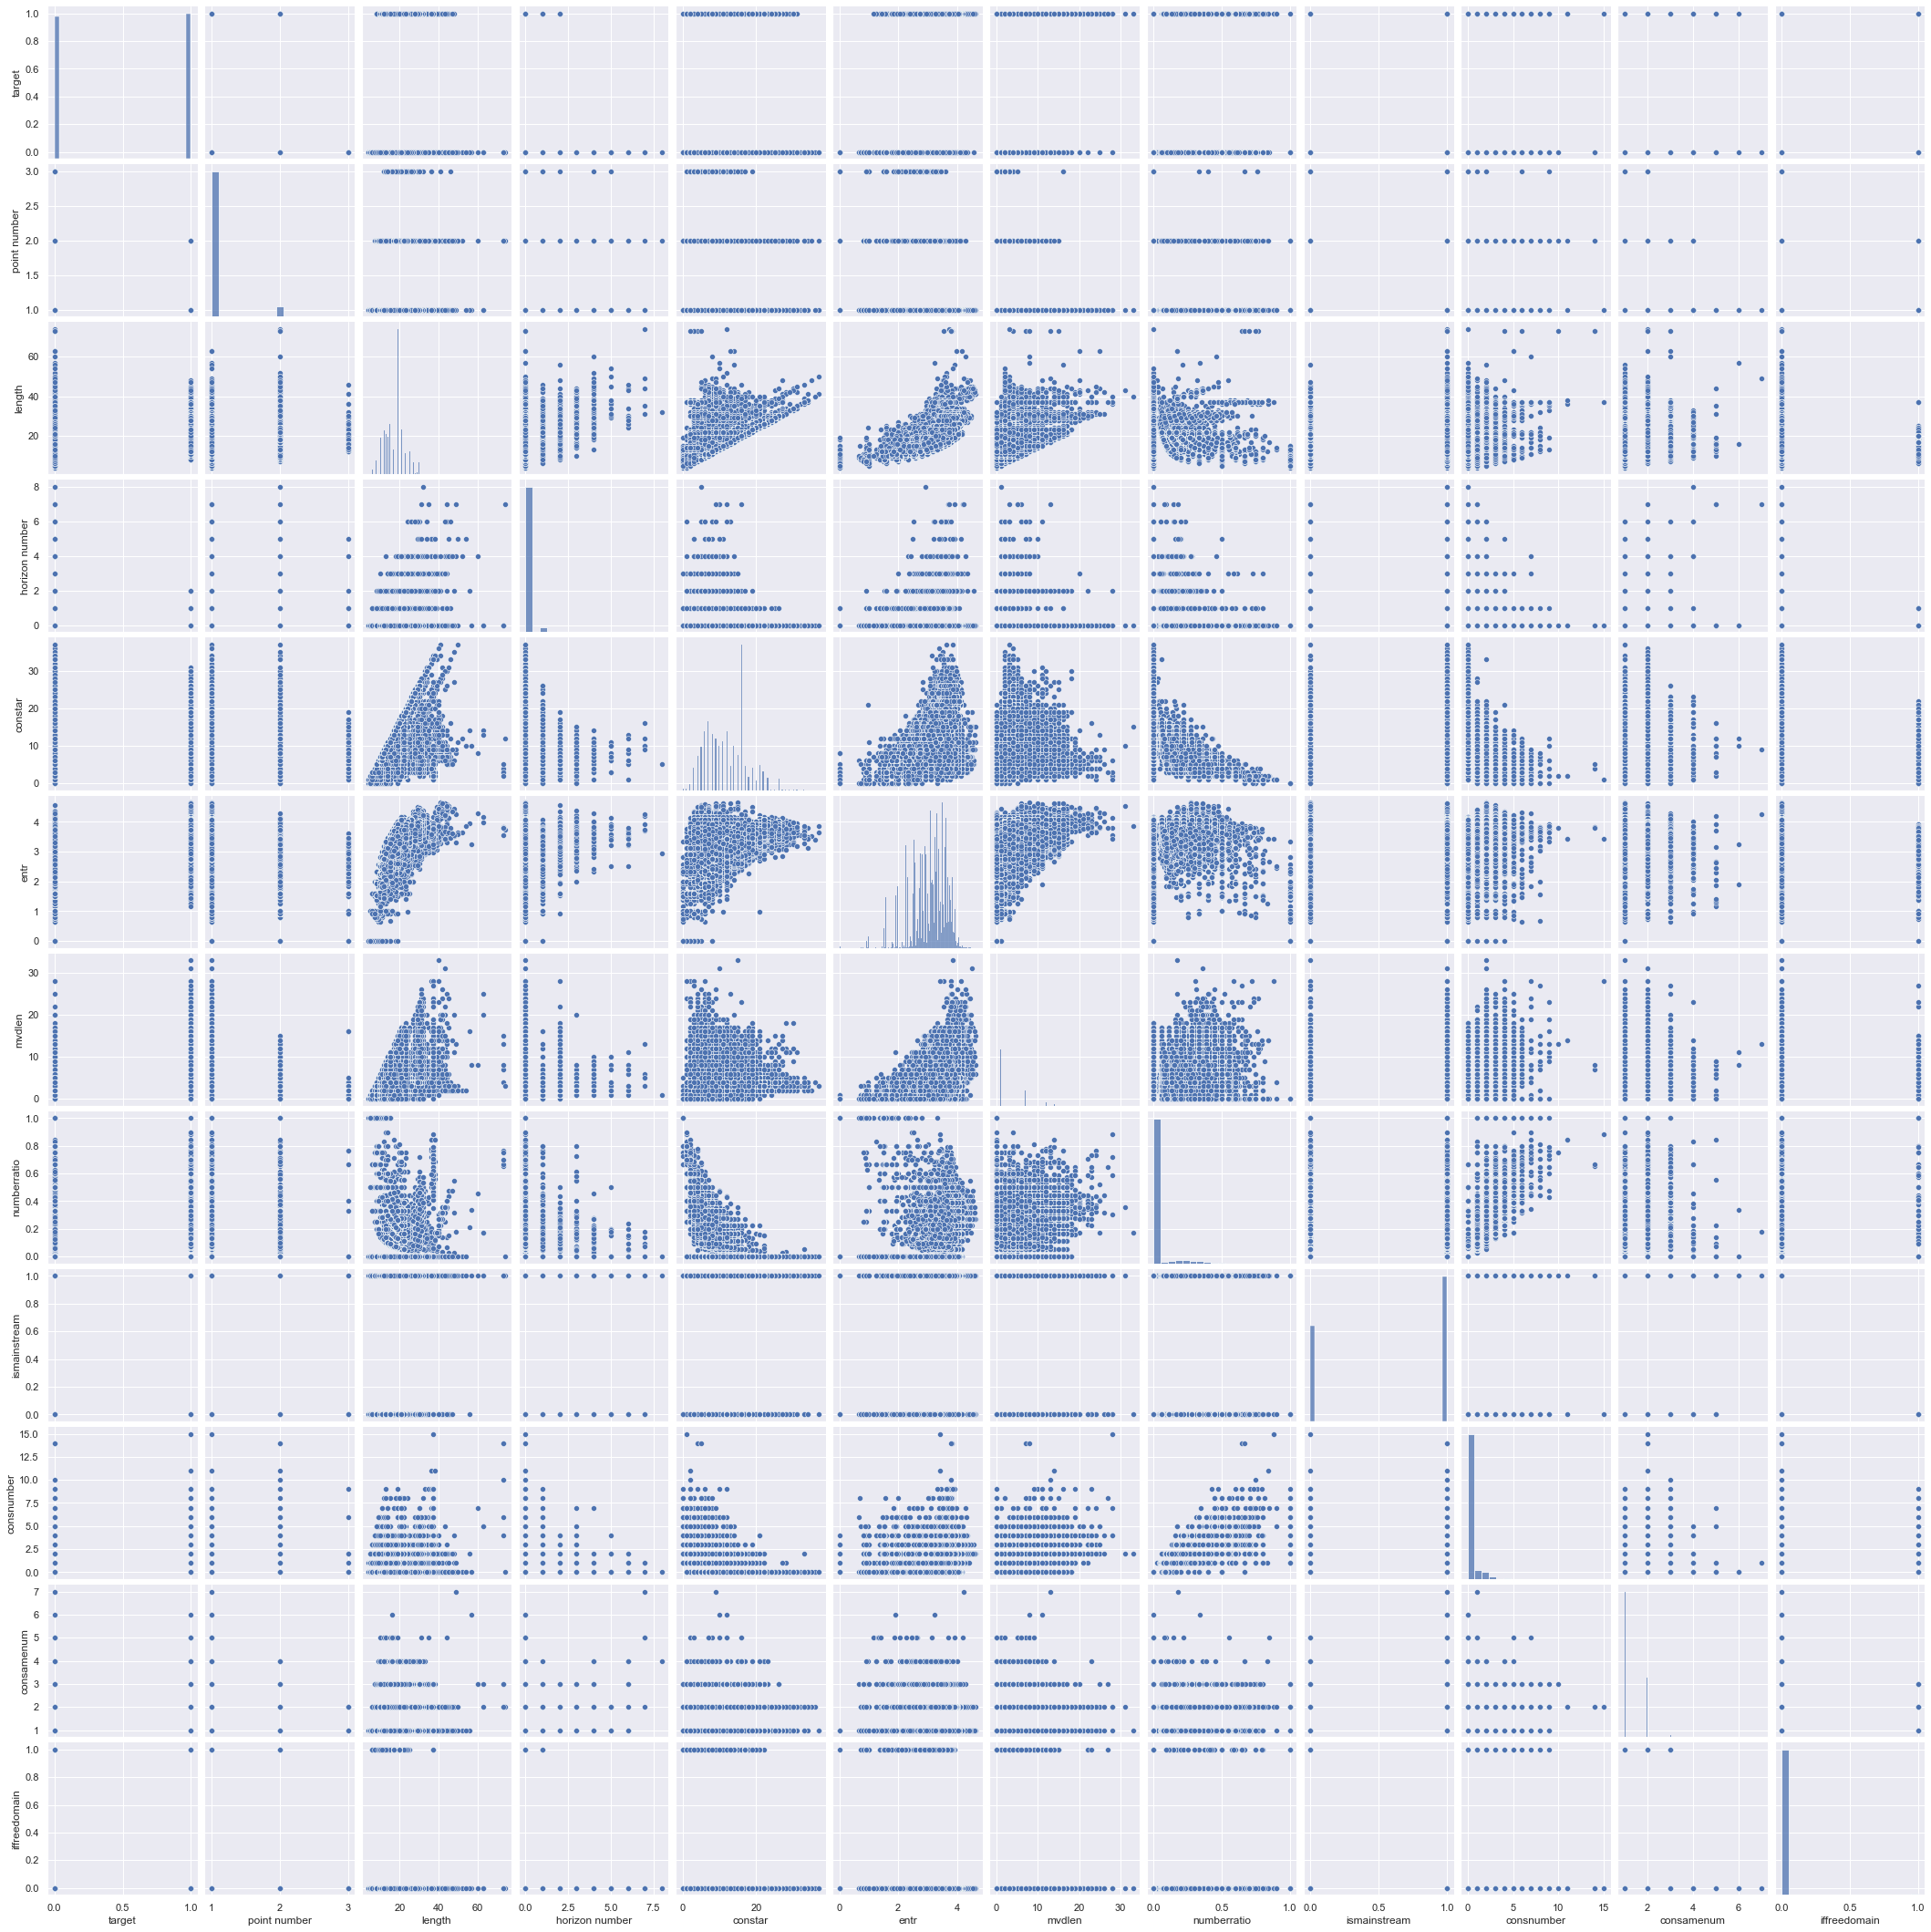

In [17]:
print("这里是特征的重要度排序：\n")
feat_labels = data_lite.columns[0:-1]
print(feat_labels)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

sns.set()
cols = ['target','point number', 'length', 'horizon number', 'constar', 'entr', 'mvdlen', 'numberratio', 'ismainstream',
                'consnumber', 'consamenum', 'iffreedomain']
sns.pairplot(data_lite[cols], size=2.5)
plt.show();

**<font color=black size=5 face=雅黑>随机森林树的数量以及最大深度的调参</font>**

In [18]:
# #这里是调参的过程，调整树的个数和最大深度
# x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, train_size=0.7)
# # 比较
# estimators = [1, 25, 50, 75, 100,200]
# depth = [1, 2, 5, 7, 15]
# err_list = []
# for es in estimators:
#     es_list = []
#     for d in depth:
#         tf = RandomForestClassifier(n_estimators=es, criterion='gini', max_depth=d, max_features=None,
#                                     random_state=0)
#         tf.fit(x_train2, y_train2)
#         st = tf.score(x_test2, y_test2)
#         err = 1 - st
#         es_list.append(err)
#         print("%d决策树数目,%d最大深度,正确率:%.3f%%" % (es, d, st * 100))
#         err_list.append(es_list)

**<font color=black size=5 face=雅黑>决策树模型的训练及分数评估</font>**

In [19]:
# #用最大深度为15的决策树拟合数据
# go_dating_tree = tree.DecisionTreeClassifier(max_depth=15)
# go_dating_tree.fit(X_train,y_train)
# # 模型的评估
# y_test_pre = go_dating_tree.predict(X_test)
# test_accuracy = go_dating_tree.score(X_test, y_test)
# print("这里是决策树模型的评估：")
# print("\n测试集的accuracy：", test_accuracy)
# test_precision = precision_score(y_test, y_test_pre)
# print("\n测试集的precision：", test_precision)
# test_recall = recall_score(y_test, y_test_pre)
# print("\n测试集的召回值：", test_recall)
# test_f1 = f1_score(y_test, y_test_pre)
# print("\n测试集的f1：", test_f1)

**<font color=black size=5 face=雅黑>KNN模型的训练及分数评估</font>**

In [20]:
# knc = KNN(n_neighbors=6, )
# knc.fit(X_train, y_train)
# y_predict = knc.predict(X_test)
# print('KNN准确率', knc.score(X_test, y_test))
# print('KNN精确率', precision_score(y_test, y_predict, average='macro'))
# print('KNN召回率', recall_score(y_test, y_predict, average='macro'))
# print('F1', f1_score(y_test, y_predict, average='macro'))

**<font color=black size=5 face=雅黑>随机森林模型对手动输入的域名进行预测</font>**

In [21]:
# # 预测过程
# print("请输入您要检测的域名：")
# input1 = input()
# list = [[]]
# # 生成预测域名的特征集
# predictlist = [[pointnumber(input1), lenth(input1), horizonnumber(input1), consecutivechar(input1),
#                 entropy(input1), mvd(input1), numberratio(input1), suffix(input1),
#                 consecutivenumber(input1), consecutivesamechar(input1),
#                 iffreedomain(input1)]]
# #使用模型做出预测
# dating_dec = forest.predict(predictlist)
# print('\n')
# print('域名%s的预测结果如下：'%input1)
# print('====================================\n')
# if dating_dec == 1:
#     print("警告！%s是个恶意域名！"%input1)
# else:
#     print("%s为良性域名。"%input1)
# print('\n====================================')
# print('\n\n\n')